# ODI Dataset EDA (As Per Match)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set(style="whitegrid", palette="muted")

## LOAD ODI MATCH SUMMARY

In [4]:
odi_matches = pd.read_csv("../data/ODI/odi_match_summary.csv")

In [5]:
print("Shape:", odi_matches.shape)

Shape: (2617, 11)


In [6]:
print("Columns:", odi_matches.columns)

Columns: Index(['match_id', 'total_runs', 'total_extras', 'total_wickets', 'winner',
       'venue', 'season', 'toss_winner', 'toss_decision', 'batting_team',
       'bowling_team'],
      dtype='object')


In [7]:
odi_matches.head()

,match_id,total_runs,total_extras,total_wickets,winner,venue,season,toss_winner,toss_decision,batting_team,bowling_team
0,64814,428,45,19,New Zealand,"McLean Park, Napier",2002/03,India,field,"['New Zealand', 'India']","['India', 'New Zealand']"
1,64815,179,38,15,New Zealand,"Jade Stadium, Christchurch",2002/03,India,bat,"['India', 'New Zealand']","['New Zealand', 'India']"
2,64816,206,39,13,New Zealand,"Davies Park, Queenstown",2002/03,New Zealand,field,"['New Zealand', 'India']","['India', 'New Zealand']"
3,64817,294,43,18,India,"Westpac Stadium, Wellington",2002/03,New Zealand,bat,"['New Zealand', 'India']","['India', 'New Zealand']"
4,64819,220,27,14,New Zealand,"Westpac Park, Hamilton",2002/03,New Zealand,field,"['India', 'New Zealand']","['New Zealand', 'India']"


## BASIC STATS

In [9]:
print("\nODI Seasons:", odi_matches['season'].unique())
print("Number of teams:", len(odi_matches['batting_team'].unique()))
print("Most frequent venues:\n", odi_matches['venue'].value_counts().head(10))


ODI Seasons: ['2002/03' '2003' '2003/04' '2004' '2004/05' '2005' '2005/06' '2006'
 '2006/07' '2007' '2007/08' '2008' '2008/09' '2009' '2009/10' '2010'
 '2010/11' '2011' '2011/12' '2012' '2012/13' '2013' '2013/14' '2014/15'
 '2014' '2015' '2015/16' '2016' '2016/17' '2017' '2017/18' '2018'
 '2018/19' '2019' '2019/20' '2020' '2020/21' '2021' '2021/22' '2022'
 '2022/23' '2023' '2023/24' '2024' '2024/25' '2025']
Number of teams: 191
Most frequent venues:
 venue
Harare Sports Club                         108
Shere Bangla National Stadium               85
Rangiri Dambulla International Stadium      51
Sydney Cricket Ground                       48
R Premadasa Stadium                         47
Pallekele International Cricket Stadium     41
County Ground                               41
Kennington Oval                             41
Melbourne Cricket Ground                    40
Queens Sports Club                          35
Name: count, dtype: int64


## RUNS & WICKETS DISTRIBUTION

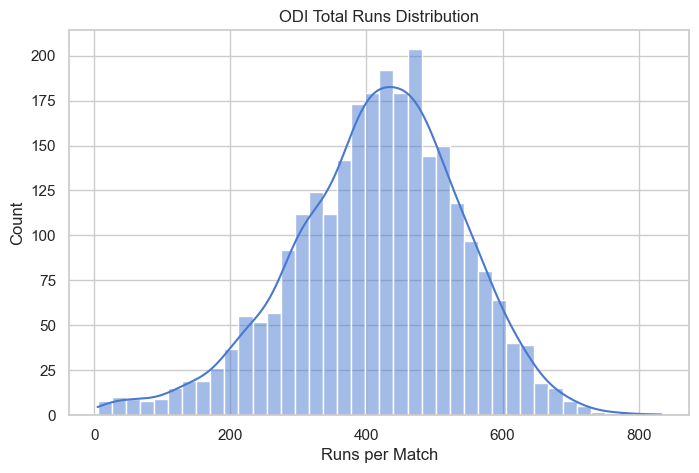

In [10]:
plt.figure(figsize=(8,5))
sns.histplot(odi_matches['total_runs'], bins=40, kde=True)
plt.title("ODI Total Runs Distribution")
plt.xlabel("Runs per Match")
plt.savefig("../Reports/Visuals/ODI/ODI Total Runs Distribution.png")
plt.show()

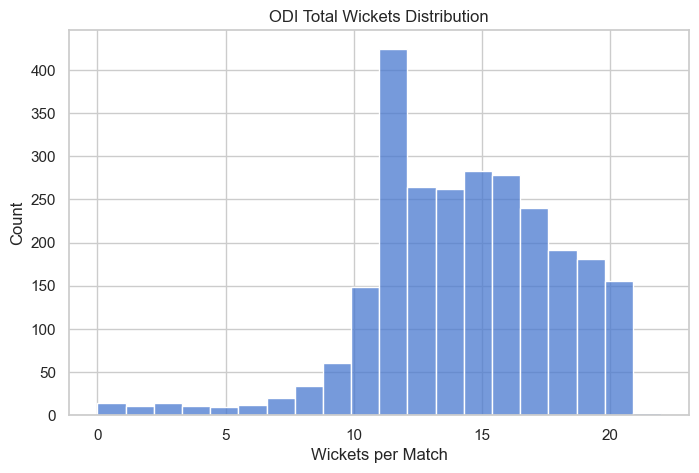

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(odi_matches['total_wickets'], bins=20, kde=False)
plt.title("ODI Total Wickets Distribution")
plt.xlabel("Wickets per Match")
plt.savefig("../Reports/Visuals/ODI/ODI Total Wickets Distribution.png")
plt.show()

## TOSS IMPACT

In [12]:
toss_impact = (odi_matches['toss_winner'] == odi_matches['winner']).mean()
print(f"ODI Toss winner also won match: {toss_impact:.2%}")

ODI Toss winner also won match: 47.42%


## VENUE TRENDS

In [13]:
top_venues = odi_matches['venue'].value_counts().head(10).index
venue_data = odi_matches[odi_matches['venue'].isin(top_venues)]

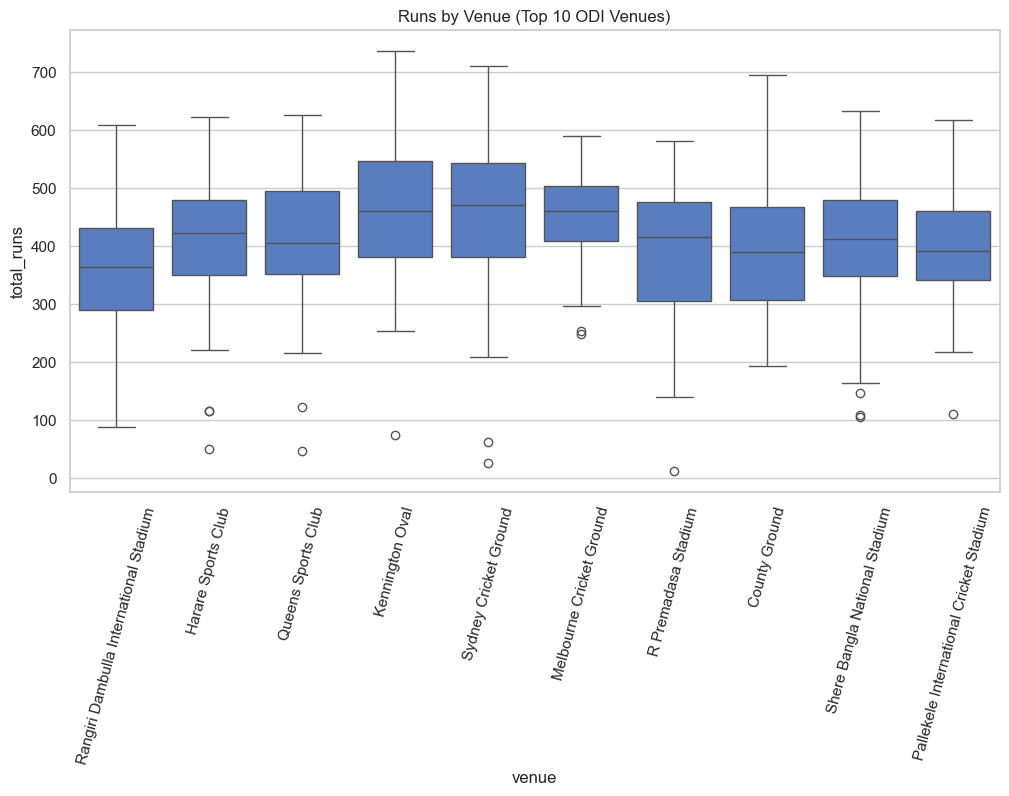

In [15]:
plt.figure(figsize=(12,6))
sns.boxplot(x='venue', y='total_runs', data=venue_data)
plt.xticks(rotation=75)
plt.title("Runs by Venue (Top 10 ODI Venues)")
plt.savefig("../Reports/Visuals/ODI/Runs by Venue (Top 10 ODI Venues).png")
plt.show()

## TEAM WINNING STATS

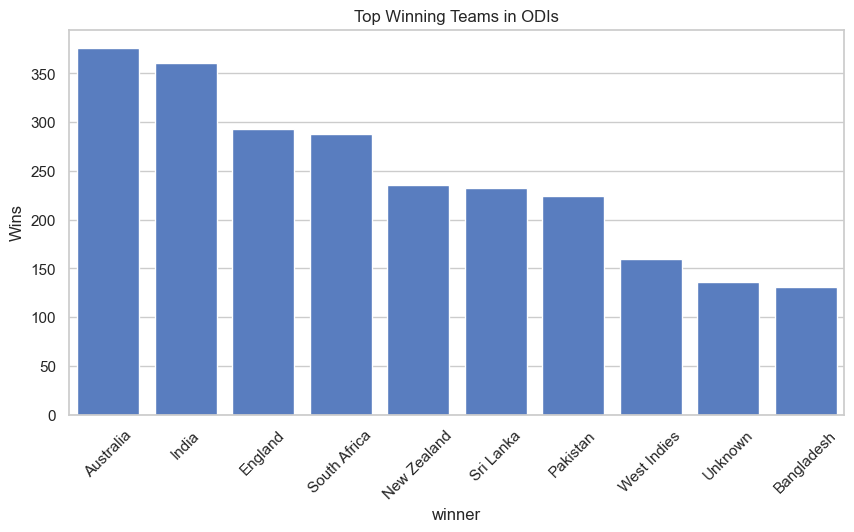

In [17]:
team_wins = odi_matches['winner'].value_counts().head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=team_wins.index, y=team_wins.values)
plt.title("Top Winning Teams in ODIs")
plt.ylabel("Wins")
plt.xticks(rotation=45)
plt.savefig("../Reports/Visuals/ODI/Top Winning Teams in ODIs.png")
plt.show()

# ODI Dataset EDA (As Per Over)

## Load Dataset

In [29]:
FORMAT = "ODI"

In [18]:
over_summary = pd.read_csv('../data/ODI/odi_over_features.csv')

In [21]:
print(f"Loaded dataset -> Shape:", over_summary.shape)

Loaded dataset -> Shape: (225816, 19)


In [22]:
over_summary.head()

,match_id,innings,over,batting_team,runs_off_bat,extras,wicket,cumulative_runs,cumulative_wickets,run_rate,winner,venue,season,toss_winner,toss_decision,overs_left,target_runs,required_runs,required_run_rate
0,64814,1,0,New Zealand,1,1,0,1,0,inf,New Zealand,"McLean Park, Napier",2002/03,India,field,50,226,NaN,NaN
1,64814,1,1,New Zealand,5,2,0,6,0,6.0,New Zealand,"McLean Park, Napier",2002/03,India,field,49,226,NaN,NaN
2,64814,1,2,New Zealand,1,0,1,7,1,3.5,New Zealand,"McLean Park, Napier",2002/03,India,field,48,226,NaN,NaN
3,64814,1,3,New Zealand,2,0,0,9,1,3.0,New Zealand,"McLean Park, Napier",2002/03,India,field,47,226,NaN,NaN
4,64814,1,4,New Zealand,1,0,0,10,1,2.5,New Zealand,"McLean Park, Napier",2002/03,India,field,46,226,NaN,NaN


## BASIC STATS

In [24]:
over_summary = over_summary.replace([np.inf, -np.inf], np.nan)

In [25]:
numeric_cols = over_summary.select_dtypes(include=[np.number]).columns
over_summary[numeric_cols] = over_summary[numeric_cols].fillna(0)

In [26]:
print("\nColumns:", over_summary.columns.tolist())
print("\nMissing values:\n", over_summary.isna().sum())
print("\nDescriptive stats:\n", over_summary.describe())


Columns: ['match_id', 'innings', 'over', 'batting_team', 'runs_off_bat', 'extras', 'wicket', 'cumulative_runs', 'cumulative_wickets', 'run_rate', 'winner', 'venue', 'season', 'toss_winner', 'toss_decision', 'overs_left', 'target_runs', 'required_runs', 'required_run_rate']

Missing values:
 match_id              0
innings               0
over                  0
batting_team          0
runs_off_bat          0
extras                0
wicket                0
cumulative_runs       0
cumulative_wickets    0
run_rate              0
winner                0
venue                 0
season                0
toss_winner           0
toss_decision         0
overs_left            0
target_runs           0
required_runs         0
required_run_rate     0
dtype: int64

Descriptive stats:
            match_id        innings           over   runs_off_bat  \
count  2.258160e+05  225816.000000  225816.000000  225816.000000   
mean   7.884680e+05       1.456744      22.350808       4.810846   
std    4.4669

## RUNS PER OVER

In [27]:
avg_runs = over_summary.groupby("over")["runs_off_bat"].mean()

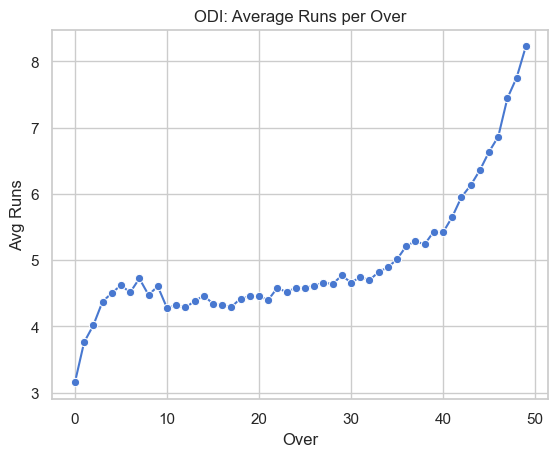

In [32]:
plt.figure()
sns.lineplot(x=avg_runs.index, y=avg_runs.values, marker="o")
plt.title(f"{FORMAT}: Average Runs per Over")
plt.xlabel("Over")
plt.ylabel("Avg Runs")
plt.savefig("../Reports/Visuals/Odi/Average Runs per Over.png")
plt.show()

## WICKETS PER OVER

In [33]:
avg_wickets = over_summary.groupby("over")["wicket"].mean()

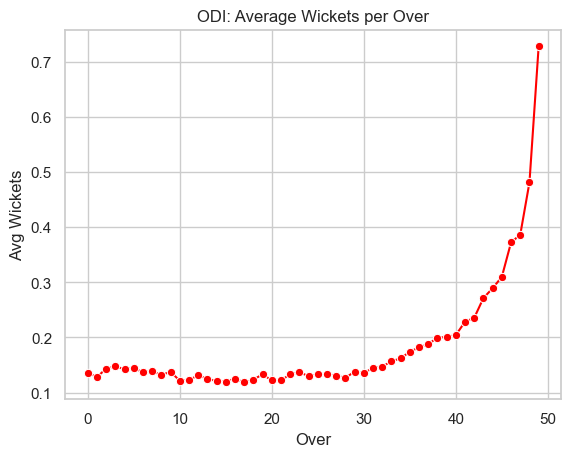

In [34]:
plt.figure()
sns.lineplot(x=avg_wickets.index, y=avg_wickets.values, marker="o", color="red")
plt.title(f"{FORMAT}: Average Wickets per Over")
plt.xlabel("Over")
plt.ylabel("Avg Wickets")
plt.savefig("../Reports/Visuals/Odi/Average Wickets per Over.png")
plt.show()

## RUN RATE PROGRESSION

In [35]:
avg_runrate = over_summary.groupby("over")["run_rate"].mean()

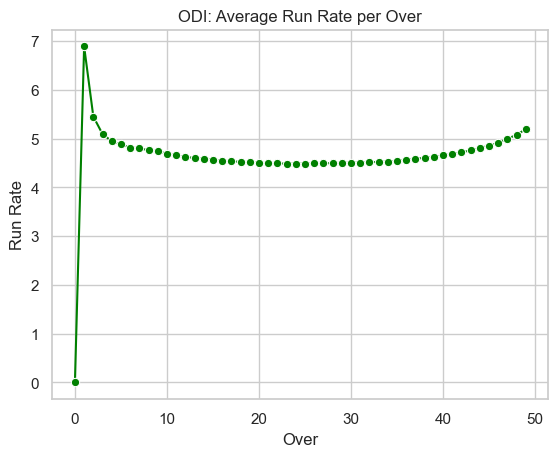

In [36]:
plt.figure()
sns.lineplot(x=avg_runrate.index, y=avg_runrate.values, marker="o", color="green")
plt.title(f"{FORMAT}: Average Run Rate per Over")
plt.xlabel("Over")
plt.ylabel("Run Rate")
plt.savefig("../Reports/Visuals/Odi/Average Run Rate per Over.png")
plt.show()

## POWERPLAY VS MIDDLE VS DEATH OVERS

In [37]:
powerplay = over_summary[over_summary["over"] <= 10]
middle = over_summary[(over_summary["over"] > 10) & (over_summary["over"] <= 40)]
death = over_summary[over_summary["over"] > 40]

In [38]:
print(f"\n{FORMAT} Over Phase Stats:")
print("Powerplay Avg Runs:", powerplay["runs_off_bat"].mean())
print("Middle Overs Avg Runs:", middle["runs_off_bat"].mean())
print("Death Overs Avg Runs:", death["runs_off_bat"].mean())


ODI Over Phase Stats:
Powerplay Avg Runs: 4.273301262778112
Middle Overs Avg Runs: 4.656629283621687
Death Overs Avg Runs: 6.652980460054415


## CUMULATIVE RUNS PROGRESSION

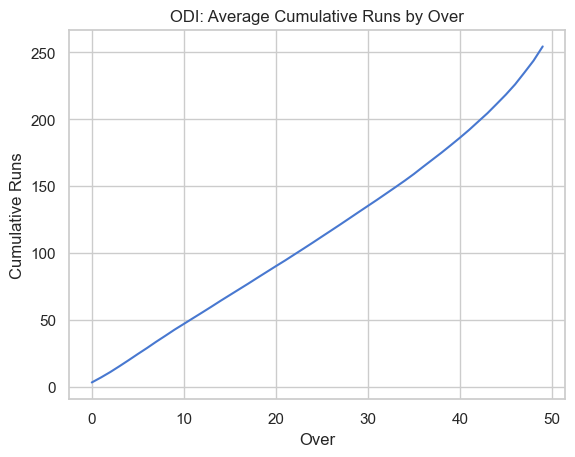

In [40]:
plt.figure()
sns.lineplot(data=over_summary, x="over", y="cumulative_runs", estimator="mean", errorbar=None)
plt.title(f"{FORMAT}: Average Cumulative Runs by Over")
plt.xlabel("Over")
plt.ylabel("Cumulative Runs")
plt.savefig("../Reports/Visuals/Odi/Average Cumulative Runs by Over.png")
plt.show()

## DISTRIBUTION PLOTS

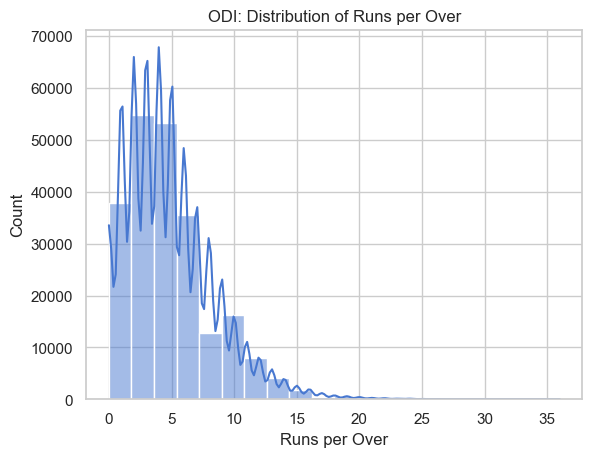

In [41]:
plt.figure()
sns.histplot(over_summary["runs_off_bat"], bins=20, kde=True)
plt.title(f"{FORMAT}: Distribution of Runs per Over")
plt.xlabel("Runs per Over")
plt.savefig("../Reports/Visuals/Odi/Distribution of Runs per Over.png")
plt.show()

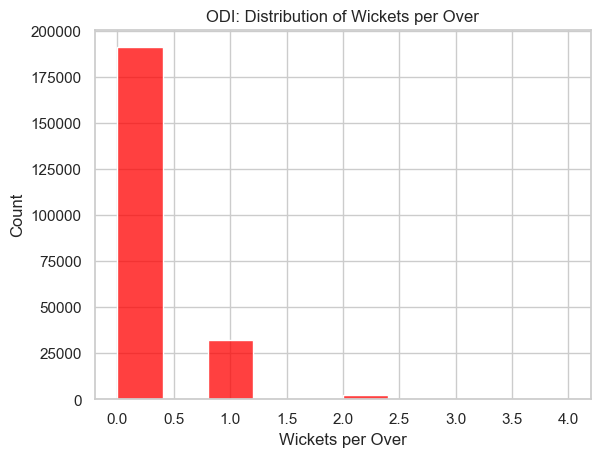

In [42]:
plt.figure()
sns.histplot(over_summary["wicket"], bins=10, kde=False, color="red")
plt.title(f"{FORMAT}: Distribution of Wickets per Over")
plt.xlabel("Wickets per Over")
plt.savefig("../Reports/Visuals/Odi/Distribution of Wickets per Over.png")
plt.show()